In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager as fm ,rc

DIR = '../../Data/'
df = pd.read_csv(DIR+'subwaytime1.csv', skiprows=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
0,Jun.22,1호선,150,서울역,646,24,8433,7694,12608,46963,...,20385,15480,158,1332,1,4,0,1,0,0
1,Jun.22,1호선,151,시청,271,7,3133,4802,3321,23621,...,9254,2938,72,422,0,2,0,0,0,0
2,Jun.22,1호선,152,종각,91,9,4007,3960,3682,22533,...,27781,3590,315,394,0,1,0,0,0,0
3,Jun.22,1호선,153,종로3가,190,12,3882,3261,3570,14038,...,17170,4119,310,843,3,3,0,0,0,0
4,Jun.22,1호선,154,종로5가,34,0,1730,3909,2986,16406,...,6208,2628,98,668,0,0,0,0,0,0


In [4]:
df1 = df.iloc[:,[11,13]]
df1 = df1.astype('int64')
df1.dtypes

하차.3    int64
하차.4    int64
dtype: object

In [5]:
df1 = df1.rename(columns={'하차.3':'07:00~07:59 하차', '하차.4':'08:00~08:59 하차'})
df1

,07:00~07:59 하차,08:00~08:59 하차
0,100397,201687
1,62427,179710
2,95376,235160
3,25469,68699
4,41304,96113
...,...,...
610,1981,5511
611,1075,1704
612,977,1319
613,3834,6306


In [6]:
df2 = df.iloc[:,[1,3]]
df2 = df2.rename(columns={'Unnamed: 1':'호선명', 'Unnamed: 3': '지하철역'})
df2

,호선명,지하철역
0,1호선,서울역
1,1호선,시청
2,1호선,종각
3,1호선,종로3가
4,1호선,종로5가
...,...,...
610,신림선,당곡
611,신림선,신림
612,신림선,서원
613,신림선,서울대벤처타운


In [7]:
subdf = pd.concat([df2,df1], axis=1)
subdf

,호선명,지하철역,07:00~07:59 하차,08:00~08:59 하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
...,...,...,...,...
610,신림선,당곡,1981,5511
611,신림선,신림,1075,1704
612,신림선,서원,977,1319
613,신림선,서울대벤처타운,3834,6306


In [12]:
subdf1 = subdf.set_index('호선명')
subdf1 = subdf1.loc[['1호선','2호선','3호선','4호선','5호선','6호선','7호선'],:]
subdf1['하차인원'] = subdf1['07:00~07:59 하차'] + subdf1['08:00~08:59 하차']
subdf1 = subdf1.reset_index('호선명')

In [13]:
subdf1

,호선명,지하철역,07:00~07:59 하차,08:00~08:59 하차,하차인원
0,1호선,서울역,100397,201687,302084
1,1호선,시청,62427,179710,242137
2,1호선,종각,95376,235160,330536
3,1호선,종로3가,25469,68699,94168
4,1호선,종로5가,41304,96113,137417
...,...,...,...,...,...
256,7호선,온수(성공회대입구),11188,16685,27873
257,7호선,까치울,0,0,0
258,7호선,신중동,0,0,0
259,7호선,상동,0,0,0


In [30]:
subdf1['하차인원'].idxmax()

252

In [10]:
max_linedf = [] 
max_index = []
x_tick = []
for i in range(1,8):
    linedf = subdf1[subdf1['호선명']==str(i)+'호선']
    max_linedf.append(linedf['하차인원'].max())
    max_index.append(linedf['하차인원'].idxmax())
    subdf1.iloc[max_index[i-1],:][1]
    x_tick.append(str(i)+'호선'+':'+subdf1.iloc[max_index[i-1],:][1])
    print(f"{i}호선 최대 하차역은 {subdf1.iloc[max_index[i-1],:][1]}역이고 하차인원은 {linedf['하차인원'].max()}")
plt.figure(figsize=(20,8)) # 그래프 크기
plt.bar(x_tick, max_linedf) # 막대그래프
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역') # 그래프 제목
plt.xticks(x_tick,rotation=80) # x축 레이블 지정하고 회전하기
plt.rc('font',size=20) # 폰트사이즈
plt.show() # 그래프 보여주기

NameError: name 'subdf1' is not defined

In [150]:
max_index

[2, 30, 83, 108, 136, 192, 252]

In [70]:
sub1 = subdf1[subdf1['호선명']=='1호선'].sort_values(by='하차인원', ascending=False)
sub2 = subdf1[subdf1['호선명']=='2호선'].sort_values(by='하차인원', ascending=False)
sub3 = subdf1[subdf1['호선명']=='3호선'].sort_values(by='하차인원', ascending=False)
sub4 = subdf1[subdf1['호선명']=='4호선'].sort_values(by='하차인원', ascending=False)
sub5 = subdf1[subdf1['호선명']=='5호선'].sort_values(by='하차인원', ascending=False)
sub6 = subdf1[subdf1['호선명']=='6호선'].sort_values(by='하차인원', ascending=False)
sub7 = subdf1[subdf1['호선명']=='7호선'].sort_values(by='하차인원', ascending=False)


sub1_list = sub1.iloc[0,:].to_list()
sub2_list = sub2.iloc[0,:].to_list()
sub3_list = sub3.iloc[0,:].to_list()
sub4_list = sub4.iloc[0,:].to_list()
sub5_list = sub5.iloc[0,:].to_list()
sub6_list = sub6.iloc[0,:].to_list()
sub7_list = sub7.iloc[0,:].to_list()

In [19]:
subdf1[subdf1['호선명']=='1호선']

,호선명,지하철역,07:00~07:59 하차,08:00~08:59 하차,하차인원
0,1호선,서울역,100397,201687,302084
1,1호선,시청,62427,179710,242137
2,1호선,종각,95376,235160,330536
3,1호선,종로3가,25469,68699,94168
4,1호선,종로5가,41304,96113,137417
5,1호선,동대문,12675,22464,35139
6,1호선,신설동,23149,56781,79930
7,1호선,제기동,19135,39898,59033
8,1호선,청량리(서울시립대입구),17531,35718,53249
9,1호선,동묘앞,9730,22640,32370


출근 시간대 1호선 최대 하차역은 종각역이고 최대 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 최대 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 최대 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 최대 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 최대 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 최대 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 최대 하차인원은 486,420명 입니다.


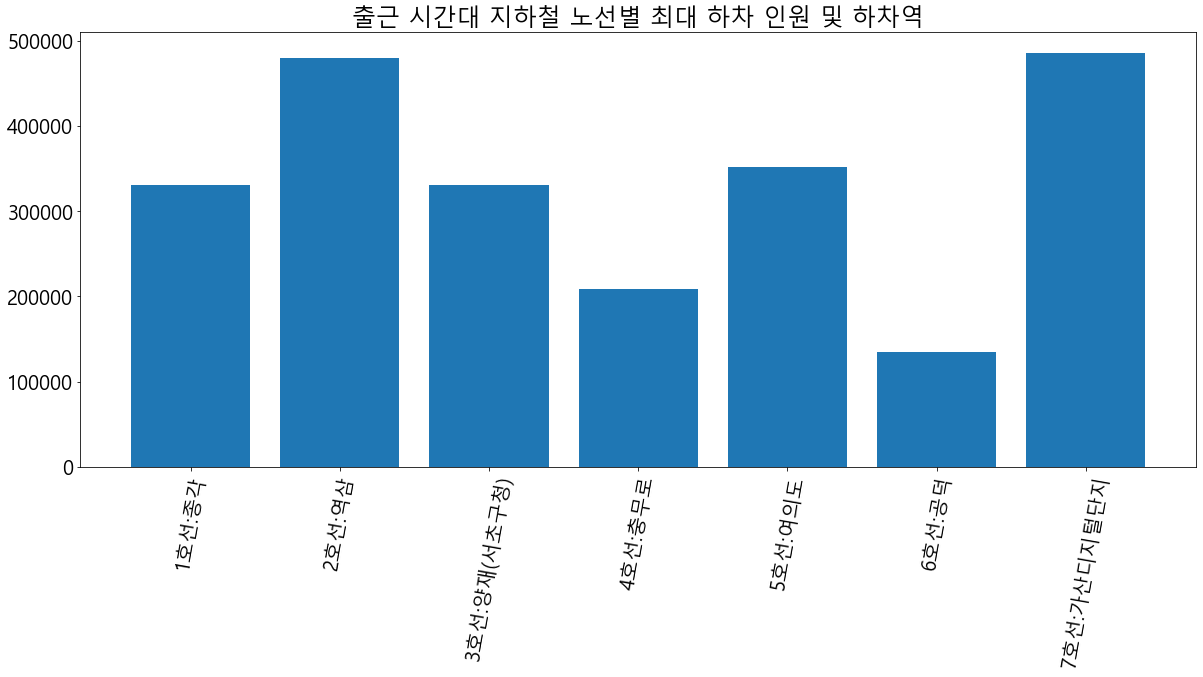

In [29]:
subpartdf = 0
x_tick = []
y_tick = []
for i in range(1,8):
    subpartdf = subdf1[subdf1['호선명']==str(i)+'호선'].sort_values(by='하차인원', ascending=False)
    sub_list = subpartdf.iloc[0,:].to_list()
    x_tick.append(sub_list[0]+':'+sub_list[1])
    y_tick.append(sub_list[4])
    print(f'출근 시간대 {sub_list[0]} 최대 하차역은 {sub_list[1]}역이고 최대 하차인원은 {sub_list[4]:,}명 입니다.')
    
# 운영체제별 한글 폰트 설정
if(platform.system()=='Windows'):
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')
    
# 그래프 그리기
plt.figure(figsize=(20,8)) # 그래프 크기
plt.bar(x_tick,y_tick) # 막대그래프
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역') # 그래프 제목
plt.xticks(x_tick,rotation=80) # x축 레이블 지정하고 회전하기
plt.rc('font',size=20) # 폰트사이즈
plt.show() # 그래프 보여주기

In [119]:
subdf1.iloc[:,2:].idxmax(axis=1)

0                하차인원
1                하차인원
2                하차인원
3                하차인원
4                하차인원
            ...      
256              하차인원
257    07:00~07:59 하차
258    07:00~07:59 하차
259    07:00~07:59 하차
260    07:00~07:59 하차
Length: 261, dtype: object

In [124]:
a = subdf1.groupby(['호선명']).max()['하차인원']
a[0]

330536

In [127]:
b = a.reset_index('호선명')

In [134]:
subdf1.groupby(['호선명']).max()['하차인원']

호선명
1호선    330536
2호선    479969
3호선    331279
4호선    208776
5호선    352602
6호선    134342
7호선    486420
Name: 하차인원, dtype: int64

In [101]:
subdf1.groupby(['호선명']).max()

,지하철역,07:00~07:59 하차,08:00~08:59 하차,하차인원
호선명,,,,
1호선,청량리(서울시립대입구),100397,235160,330536
2호선,홍대입구,147542,341386,479969
3호선,홍제,106035,225244,331279
4호선,회현(남대문시장),52579,156197,208776
5호선,화곡,133189,251100,352602
6호선,효창공원앞,38234,96108,134342
7호선,학동,117899,368521,486420


In [91]:
x_tick=[]
y_value=[]

for i in [sub1_list,sub2_list,sub3_list,sub4_list,sub5_list,sub6_list,sub7_list]:
    x_tick.append(i[0]+':'+i[1])
    y_value.append(i[-1])

In [97]:
x_tick

['1호선:종각',
 '2호선:역삼',
 '3호선:양재(서초구청)',
 '4호선:충무로',
 '5호선:여의도',
 '6호선:공덕',
 '7호선:가산디지털단지']

In [93]:
y_value

[330536, 479969, 331279, 208776, 352602, 134342, 486420]

출근 시간대 1호선 최대 하자역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하자역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하자역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하자역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하자역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하자역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하자역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


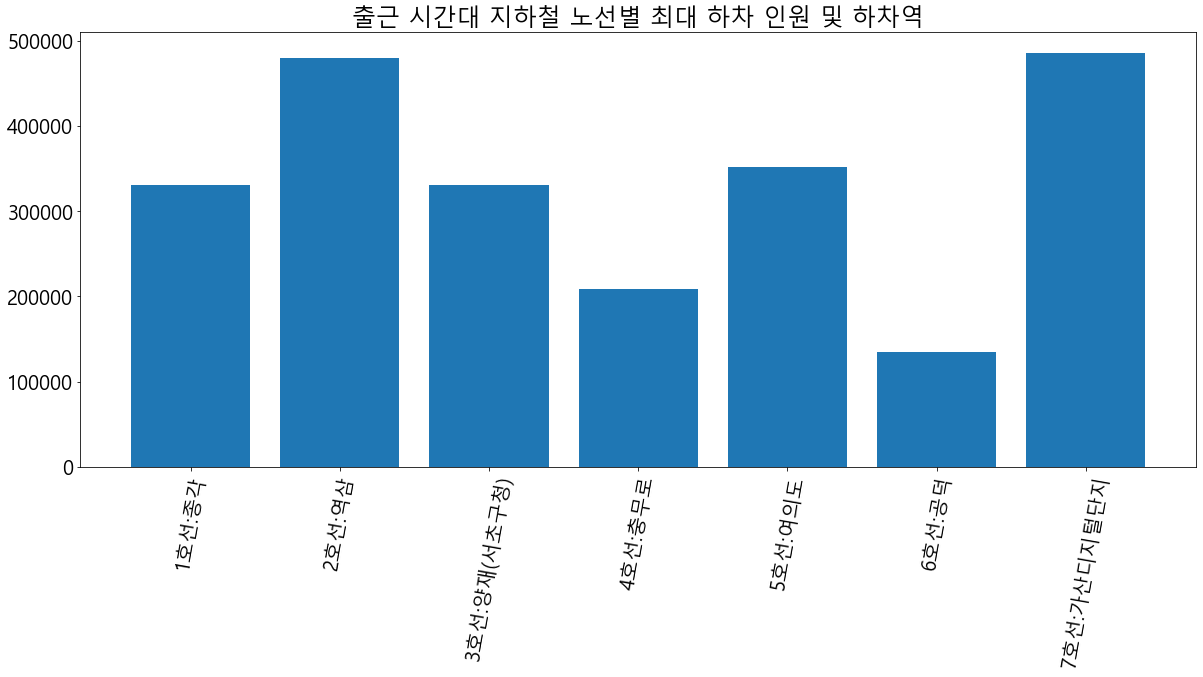

In [99]:
print(f'출근 시간대 {sub1_list[0]} 최대 하자역은 {sub1_list[1]}역이고 하차인원은 {sub1_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub2_list[0]} 최대 하자역은 {sub2_list[1]}역이고 하차인원은 {sub2_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub3_list[0]} 최대 하자역은 {sub3_list[1]}역이고 하차인원은 {sub3_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub4_list[0]} 최대 하자역은 {sub4_list[1]}역이고 하차인원은 {sub4_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub5_list[0]} 최대 하자역은 {sub5_list[1]}역이고 하차인원은 {sub5_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub6_list[0]} 최대 하자역은 {sub6_list[1]}역이고 하차인원은 {sub6_list[4]:,}명 입니다.')
print(f'출근 시간대 {sub7_list[0]} 최대 하자역은 {sub7_list[1]}역이고 하차인원은 {sub7_list[4]:,}명 입니다.')

# 운영체제별 한글 폰트 설정
if(platform.system()=='Windows'):
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')

# 그래프 그리기
plt.figure(figsize=(20,8)) # 그래프 크기
plt.bar(x_tick,y_value) # 막대그래프
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역') # 그래프 제목
plt.xticks(x_tick,rotation=80) # x축 레이블 지정하고 회전하기
plt.rc('font',size=20) # 폰트사이즈
plt.show() # 그래프 보여주기